In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_temp=pd.read_csv("base_datos/GlobalLandTemperaturesByCountry.csv")
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
df_temp["Country"].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [6]:
df_temp["year"]=pd.to_datetime(df_temp["dt"])
df_temp["year"]

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [7]:
df_temp["year"]

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

Para filtrar el dataset desde una fecha particular

In [8]:
idx=df_temp["year"]>pd.to_datetime('1970-01-01')
df_temp=df_temp[idx]


In [9]:
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [10]:
df_temp_averange=df_temp.groupby(["Country",
        pd.Grouper(key="year",freq="1Y")]).agg({"AverageTemperature":[np.mean,np.median]})

Si se quiere escoger un indice en particular se utiliza el paramento .xs("indice")

<AxesSubplot:xlabel='year'>

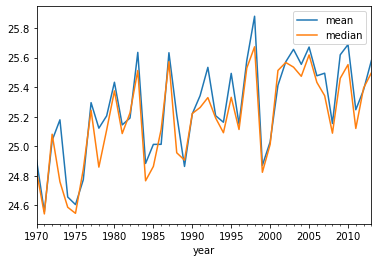

In [11]:
df_temp_averange.xs("Colombia")["AverageTemperature"].plot()

In [12]:
df_t_median=df_temp_averange["AverageTemperature"][["median"]].reset_index()

In [13]:
df_t_median

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [14]:
df_t_median["date"]= df_t_median["year"].dt.year


In [15]:
df_t_median.rename(columns={"median": "Temperature"},inplace=True)

In [16]:
df_t_median

,Country,year,Temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


# boxplots

In [17]:
df_t_pivot=df_t_median.pivot_table(values="Temperature",index="date",columns="Country")

<AxesSubplot:>

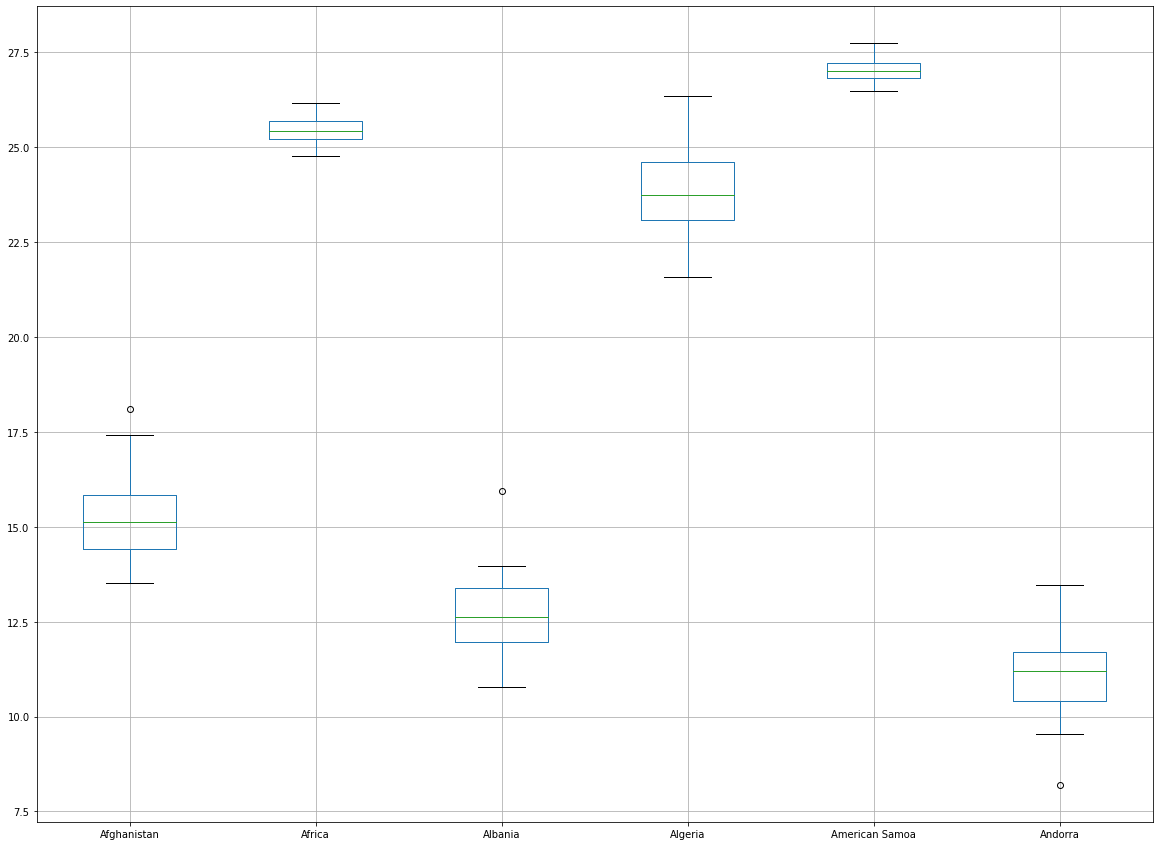

In [18]:
df_t_pivot.loc[:,:"Andorra"].boxplot(figsize=(20,15))

<AxesSubplot:>

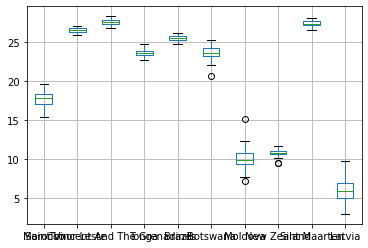

In [19]:
df_t_pivot.T.sample(10).T.boxplot()

# Analisis y limpieza de datos

In [20]:
df_agri=pd.read_csv("base_datos/Agricultura/API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv",header=2)
df_fore=pd.read_csv("base_datos/Deforestacion/API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv",header=2)
df_elec=pd.read_csv("base_datos/ProdElect/API_19_DS2_en_csv_v2_3470836.csv",header=2)
df_co2e=pd.read_csv("base_datos/EmisionCO2/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv",header=2)
df_popu=pd.read_csv("base_datos/Poblacion/API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv",header=2)

In [21]:
years = [str(i) for i in range(1971,2016)]
cols = ['Country Name','Country Code'] + years

In [22]:
labels=["df_agri","df_fore","df_elec","df_co2e","df_popu"]

Seleccionar las columans que son de mi interes

In [23]:
df_agri.loc[:,cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00,20.00,20.0
1,Africa Eastern and Southern,AFE,5360170.0,5365870.0,5366130.0,5367810.0,5371960.0,5374560.0,5374970.0,5385870.0,...,5309259.72,5324692.99,5356256.56,5380079.83,5398501.8,6392500.50,6459157.24,6477782.40,6497055.30,6505845.2
2,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,...,379100.00,379100.00,379100.00,379100.00,379110.0,379100.00,379100.00,379100.00,379100.00,379100.0
3,Africa Western and Central,AFW,3102665.6,3060380.0,3111330.0,3064870.0,3060690.0,3066700.0,3023890.0,3013030.0,...,3481821.00,3497969.35,3524364.40,3536365.75,3551895.8,3559485.78,3574436.40,3594810.30,3597067.70,3599501.6
4,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,...,502917.56,508468.17,514018.78,519569.39,525120.0,530670.62,536221.24,541771.86,547322.48,552873.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5700.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,...,236270.00,236270.00,235170.00,234520.00,235790.0,234520.00,235010.00,234990.00,234516.00,234326.0
263,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,...,968880.00,968900.00,971080.00,969880.00,968910.0,963740.00,963410.00,963410.00,963410.00,963410.0
264,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,...,230480.00,229840.00,230870.00,235860.00,234360.0,236360.00,238360.00,237360.00,238360.00,238360.0


Realizo un melt

In [24]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code'],var_name="date").rename(
        columns={ "Country Name":"Country",
                   "Country Code": "name",
                   "value": "agriculture"
        }
)

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11965,Kosovo,XKX,2015,NaN
11966,"Yemen, Rep.",YEM,2015,234326.0
11967,South Africa,ZAF,2015,963410.0
11968,Zambia,ZMB,2015,238360.0


In [25]:
def fun_formato(df,col="agriculture"):
    return df.loc[:,cols].melt(id_vars=['Country Name','Country Code'],var_name="date").rename(
        columns={ "Country Name":"Country",
                   "Country Code": "name",
                   "value": col
        }
)



In [26]:
df_agri= fun_formato(df_agri,col="agriculture")
df_fore= fun_formato(df_fore,col="deforestacion")
df_co2e= fun_formato(df_co2e,col="co2")
df_elec= fun_formato(df_elec,col="electricProd")
df_popu= fun_formato(df_popu,col="Population")

In [27]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11970 non-null  object 
 1   name        11970 non-null  object 
 2   date        11970 non-null  object 
 3   Population  11899 non-null  float64
dtypes: float64(1), object(3)
memory usage: 374.2+ KB


In [28]:
df_popu["date"]=df_popu["date"].astype(float)
df_fore["date"]=df_fore["date"].astype(float)
df_agri["date"]=df_agri["date"].astype(float)
df_elec["date"]=df_elec["date"].astype(float)
df_co2e["date"]=df_co2e["date"].astype(float)

In [29]:
df_merge=pd.merge(df_t_median[["Country","date","Temperature"]],
                df_popu, on =  ["Country","date"],how ="inner")

In [30]:
df_merge=pd.merge(df_merge,
                df_co2e, on =  ["Country","name","date"],how ="inner")

df_merge=pd.merge(df_merge,
                df_elec, on =  ["Country","name","date"],how ="inner")

df_merge=pd.merge(df_merge,
                df_agri, on =  ["Country","name","date"],how ="inner")

df_merge=pd.merge(df_merge,
                df_fore, on =  ["Country","name","date"],how ="inner")



In [31]:
df_merge.set_index(["Country","date"]).sort_index()[["deforestacion"]]

deforestacion
Country     date               
Afghanistan 1971            NaN
            1971            NaN
            1971            NaN
            1971            NaN
            1971            NaN
...                         ...
Zimbabwe    2013       177670.7
            2013       177670.7
            2013       177670.7
            2013       177670.7
            2013       177670.7

[549024 rows x 1 columns]

Dado que existen datos nulos se quiere completar esto con la mediana de cada año o en este caso por facilidad solo se eliminaran (aunque lo recomendado para mi en este caso es calcular la media de cada año y llenar los nulosd)

In [32]:
df_merge.dropna(inplace=True)

¿Cuales son los paises que pas co2 producen?

In [33]:
pd.set_option("display.float_format","{:,.1f}".format)

In [34]:
df_merge.groupby("Country")["co2"].median().sort_values(ascending=False)

Country
North America   6,029,122.6
United States   5,547,990.0
China           3,808,330.0
Japan           1,172,790.0
India             987,530.0
                    ...    
Samoa                 160.0
Dominica              140.0
Tonga                 110.0
Comoros               110.0
Kiribati               40.0
Name: co2, Length: 155, dtype: float64

In [35]:
first_10=df_merge.groupby("Country")["co2"].median().sort_values(ascending=False).head(10).index

In [36]:
df_max_co2=df_merge[df_merge["Country"].isin(first_10)]
df_max_co2

,Country,date,Temperature,name,Population,co2,electricProd,agriculture,deforestacion
96216,Canada,1990,-4.6,CAN,"27,691,138.0","419,120.0",76.6,"614,030.0","3,482,729.3"
96217,Canada,1990,-4.6,CAN,"27,691,138.0","419,120.0","21,206,427.0","614,030.0","3,482,729.3"
96218,Canada,1990,-4.6,CAN,"27,691,138.0","419,120.0",1.5,"614,030.0","3,482,729.3"
96219,Canada,1990,-4.6,CAN,"27,691,138.0","419,120.0","27,691,138.0","614,030.0","3,482,729.3"
96220,Canada,1990,-4.6,CAN,"27,691,138.0","419,120.0",1.5,"614,030.0","3,482,729.3"
...,...,...,...,...,...,...,...,...,...
532674,United States,2013,14.1,USA,"316,059,947.0","5,089,500.0",33.8,"4,036,270.0","3,095,450.0"
532675,United States,2013,14.1,USA,"316,059,947.0","5,089,500.0","3,095,450.0","4,036,270.0","3,095,450.0"
532681,United States,2013,14.1,USA,"316,059,947.0","5,089,500.0",17.0,"4,036,270.0","3,095,450.0"
532682,United States,2013,14.1,USA,"316,059,947.0","5,089,500.0",44.1,"4,036,270.0","3,095,450.0"


In [37]:
df_max_co2=df_max_co2.groupby(["Country","date"]).mean().reset_index()

In [38]:
df_max_co2

,Country,date,Temperature,Population,co2,electricProd,agriculture,deforestacion
0,Canada,1990,-4.6,"27,691,138.0","419,120.0","77,088,528.2","614,030.0","3,482,729.3"
1,Canada,1991,-4.2,"28,037,420.0","412,930.0","87,804,989.1","615,332.5","3,482,258.3"
2,Canada,1992,-5.0,"28,371,264.0","426,000.0","95,452,782.2","614,650.0","3,481,787.4"
3,Canada,1993,-4.0,"28,684,764.0","422,680.0","109,674,543.0","613,970.0","3,481,316.4"
4,Canada,1994,-3.4,"29,000,663.0","438,820.0","127,217,849.3","613,290.0","3,480,845.5"
...,...,...,...,...,...,...,...,...
235,United States,2009,8.4,"306,771,529.0","5,159,550.0","3,013,427,984.5","4,089,470.0","3,082,016.0"
236,United States,2010,10.2,"309,327,143.0","5,392,870.0","2,934,360,506.0","4,069,917.0","3,087,200.0"
237,United States,2011,9.5,"311,583,481.0","5,172,100.0","4,156,349,134.5","4,050,364.0","3,089,950.0"
238,United States,2012,9.9,"313,877,662.0","4,950,210.0","4,350,064,031.0","4,030,810.5","3,092,700.0"


<AxesSubplot:xlabel='Population', ylabel='co2'>

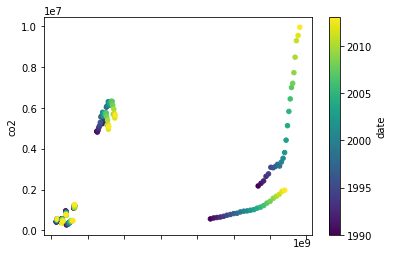

In [39]:

df_max_co2.set_index("Country").plot.scatter(
    x="Population",
    y="co2",
    c="date",
    colormap="viridis"
)


In [40]:
df_merge.corr()

,date,Temperature,Population,co2,electricProd,agriculture,deforestacion
date,1.0,0.0,0.0,0.0,0.0,-0.0,-0.0
Temperature,0.0,1.0,-0.1,-0.2,-0.0,-0.1,-0.2
Population,0.0,-0.1,1.0,0.6,0.0,0.6,0.4
co2,0.0,-0.2,0.6,1.0,0.1,0.8,0.7
electricProd,0.0,-0.0,0.0,0.1,1.0,0.1,0.1
agriculture,-0.0,-0.1,0.6,0.8,0.1,1.0,0.7
deforestacion,-0.0,-0.2,0.4,0.7,0.1,0.7,1.0


<AxesSubplot:>

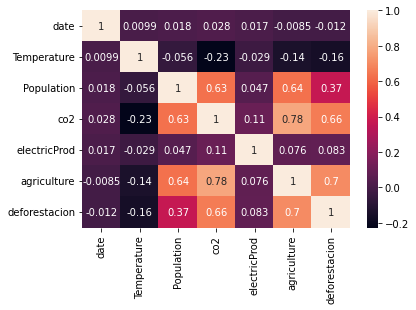

In [41]:
sns.heatmap(df_merge.corr(),annot=True)

analisis nuevamente por todo el mundo todas las variables por año

In [42]:
df_med=df_merge.groupby("date").median()


<AxesSubplot:>

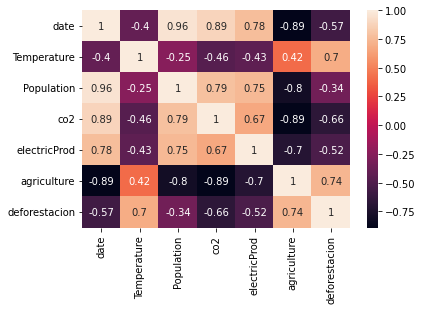

In [43]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [44]:
df_med.reset_index()

,date,Temperature,Population,co2,electricProd,agriculture,deforestacion
0,1990,23.8,"8,036,849.0","11,520.0",17.4,"67,260.0","47,812.0"
1,1991,23.4,"8,246,662.0","9,780.0",18.6,"67,550.0","47,651.5"
2,1992,22.5,"7,840,709.0","13,970.0",21.7,"61,540.0","37,881.6"
3,1993,22.6,"7,905,633.0","13,560.0",20.2,"61,300.0","37,944.1"
4,1994,22.6,"7,936,118.0","13,540.0",20.0,"61,590.0","38,006.6"
5,1995,22.5,"7,819,239.0","13,740.0",20.2,"61,640.0","34,493.9"
6,1996,22.4,"7,952,766.0","14,230.0",21.4,"61,640.0","34,795.6"
7,1997,22.5,"8,030,721.0","14,500.0",22.5,"61,950.0","35,097.3"
8,1998,22.9,"8,214,427.0","15,510.0",25.9,"56,450.0","35,398.9"
9,1999,22.4,"8,319,070.0","15,200.0",25.7,"56,790.0","35,700.6"


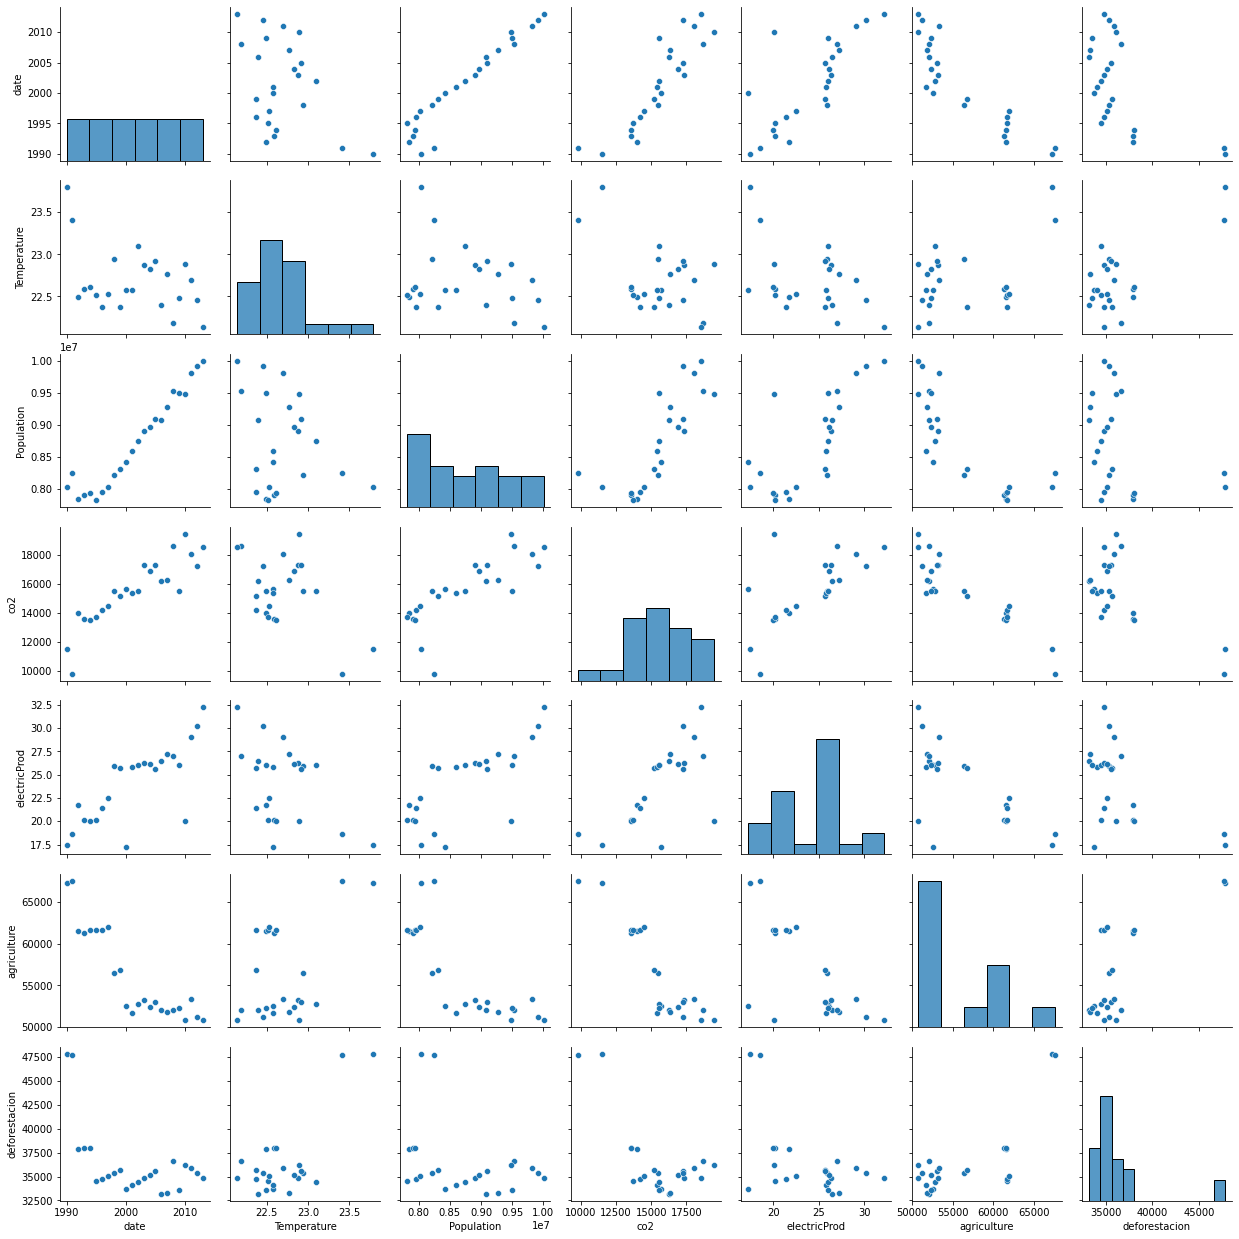

In [45]:
sns.pairplot(data=df_med.reset_index())

Correalcion calculada en cada pais

In [46]:
corxpais=df_max_co2.groupby("Country").corr()

In [47]:
df_max_co2.columns.values

array(['Country', 'date', 'Temperature', 'Population', 'co2',
       'electricProd', 'agriculture', 'deforestacion'], dtype=object)

# Analizar suramerica

In [48]:
df_merge=df_merge.groupby(["Country","date"]).mean().reset_index()
df_merge

,Country,date,Temperature,Population,co2,electricProd,agriculture,deforestacion
0,Afghanistan,1990,14.5,"12,412,311.0","2,960.0","572,920.1","380,400.0","12,084.4"
1,Afghanistan,1991,14.4,"13,299,016.0","2,740.0","517,328.6","380,300.0","12,084.4"
2,Afghanistan,1992,13.8,"14,485,543.0","1,430.0","529,458.1","380,300.0","12,084.4"
3,Afghanistan,1993,14.1,"15,816,601.0","1,360.0","594,824.6","379,340.0","12,084.4"
4,Afghanistan,1994,13.6,"17,075,728.0","1,300.0","661,615.8","378,130.0","12,084.4"
...,...,...,...,...,...,...,...,...
3609,Zimbabwe,2009,22.5,"12,526,964.0","7,750.0","1,482,273.6","163,000.0","179,513.5"
3610,Zimbabwe,2010,23.3,"12,697,728.0","9,810.0","2,100,500.9","162,000.0","179,052.8"
3611,Zimbabwe,2011,22.9,"12,894,323.0","11,490.0","2,971,479.8","164,000.0","178,592.1"
3612,Zimbabwe,2012,23.0,"13,115,149.0","12,110.0","3,441,502.5","162,000.0","178,131.4"


In [49]:
Ind_paises_suramerica=df_merge["Country"].isin(["Colombia",
                               "Argentina",
                               "Bolivia",
                               "Mexico"])

In [50]:
df_samerica=df_merge[Ind_paises_suramerica][["Country",
        "Temperature",
        "co2",
        "agriculture",
        "deforestacion"]]

In [51]:
from pandas.plotting import parallel_coordinates

<AxesSubplot:>

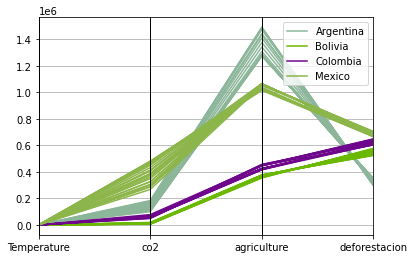

In [52]:
parallel_coordinates(df_samerica,"Country")